# Descriptive Statistics

In [27]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Show statistics in non-scientific format
pd.options.display.float_format = '{:.2f}'.format

## Import Data

In [18]:
# Load the data
data = pd.read_json('../data/kickstarter.json', lines=True)
print(data.shape)

(429463, 129)


## Check number of NAs in each column

In [19]:
# Get number of na values in each column
print(data.isna().sum())

id                                                                   0
photo_key                                                           75
photo_full                                                           0
photo_ed                                                             0
photo_med                                                            0
photo_little                                                         0
photo_small                                                          0
photo_thumb                                                          0
photo_1024x576                                                   10303
photo_1536x864                                                   10303
name                                                                 0
blurb                                                                0
goal                                                                 0
pledged                                                              0
state 

In [ ]:
print(data.columns.tolist())

## Raw Data Descriptive Statistics

### Kickstarter by creation, launch and deadline

In [ ]:
# Show statistics of data by created year, launched year, and deadline year
data['created_at'] = pd.to_datetime(data['created_at'], unit='s')
data['launched_at'] = pd.to_datetime(data['launched_at'], unit='s')
data['deadline'] = pd.to_datetime(data['deadline'], unit='s')

data['created_year'] = data['created_at'].dt.year
data['launched_year'] = data['launched_at'].dt.year
data['deadline_year'] = data['deadline'].dt.year

# Show in one dataframe
years = pd.concat([data['created_year'].value_counts(), data['launched_year'].value_counts(), data['deadline_year'].value_counts()], axis = 1, keys=['Created Year', 'Launched Year', 'Deadline Year'])
years.sort_index()

In [ ]:
# Show in one plot
years.sort_index().plot(kind='bar', figsize=(15, 5))
plt.title('Number of Projects by Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.show()



### Kickstarters by Project State

In [ ]:
# Get total number of projects
total_projects = len(data)
print(f'Total number of projects: {total_projects}')
print('\n')

# Total number of projects by state
projects_by_state = pd.concat([data['state'].value_counts(), data['state'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(projects_by_state)

### Kickstarters by Country

In [ ]:
country_data = pd.concat([data['country'].value_counts(), data['country'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(country_data)

### Kickstarters by Category

In [ ]:
data['category_name'].value_counts().sort_index()

### Kickstarters by Dollar Goal Bins

In [ ]:
data['pledged_usd_static'] = data['pledged'] * data['static_usd_rate']
data['goal_usd_static'] = data['goal'] * data['static_usd_rate']

bins = [0, 10, 100, 1000, 10000, 100000, 1000000, np.inf]

data['Goal Bins (in US$)'] = pd.cut(data['goal_usd_static'], bins, labels = ['$1-$10', '$10-$100', '$100-$1k', '$1k-$10k', '$10k-$100k', '$100k-$1M', '$1M+'])
# Also create a percentage of total in each bin
bins = pd.concat([data['Goal Bins (in US$)'].value_counts(), data['Goal Bins (in US$)'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(bins.sort_index())

### Kickstarter by Average Duration

In [ ]:
# Calculate the average duration of Kickstarter
data['duration'] = (data['deadline'] - data['launched_at']).dt.days

# Calculate the average duration of Kickstarter by state
duration_by_state = data.groupby('category_name')['duration']
duration_by_state = pd.concat([duration_by_state.mean(), duration_by_state.median(), duration_by_state.min(), duration_by_state.max()], axis = 1, keys=['Mean', 'Median', 'Minimum', 'Maximum'])
print(duration_by_state)

## First Project Descriptive Statistics

In [4]:
#Import Data
creator_data = pd.read_json('../data/creator_first_project.json', lines = True)
creator_data.shape

(328652, 147)

### Creators by Launch Year

In [6]:
# Get number of creators by creation year, launch year, and deadline year
date_columns = ['launched_at', 'created_at', 'deadline']
creator_data[date_columns] = creator_data[date_columns].apply(pd.to_datetime, unit='s')

creator_data['launched_year'] = creator_data['launched_at'].dt.year
creator_data['created_year'] = creator_data['created_at'].dt.year
creator_data['deadline_year'] = creator_data['deadline'].dt.year

# Show in one dataframe
years = pd.concat([creator_data['launched_year'].value_counts(), creator_data['created_year'].value_counts(), creator_data['deadline_year'].value_counts()], axis = 1, keys=['launched_year', 'created_year', 'deadline_year'])
years.sort_index()


,launched_year,created_year,deadline_year
2009,883,990,597
2010,6701,7079,5821
2011,15222,16183,14650
2012,23981,26112,24291
2013,24627,25848,24320
2014,40799,42282,39580
2015,47474,45742,47803
2016,32062,31205,32578
2017,27566,27064,27969
2018,22108,21860,22405


### Creators by Project State

In [7]:
# Get total number of projects
total_projects = len(creator_data)
print(f'Total number of projects: {total_projects}')
print('\n')

# Total number of projects by state
projects_by_state = pd.concat([creator_data['state'].value_counts(), creator_data['state'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(projects_by_state)

Total number of projects: 328652


             Total  Percentage
state                         
successful  163258   49.675036
failed      147189   44.785670
canceled     18205    5.539294


### Creators by Country

In [8]:
country_data = pd.concat([creator_data['country'].value_counts(), creator_data['country'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(country_data)

          Total  Percentage
country                    
US       231796   70.529314
GB        33178   10.095177
CA        14704    4.474033
AU         7654    2.328907
DE         5772    1.756265
FR         4655    1.416392
IT         4257    1.295291
MX         4179    1.271558
ES         3741    1.138286
HK         2963    0.901562
NL         2800    0.851965
SE         2131    0.648406
DK         1381    0.420201
NZ         1341    0.408030
JP         1323    0.402553
SG         1316    0.400424
CH         1159    0.352653
IE          960    0.292102
BE          916    0.278714
AT          838    0.254981
NO          721    0.219381
PL          464    0.141183
GR          239    0.072721
LU           93    0.028297
SI           71    0.021603


### Creators by Category

In [11]:
category_data = pd.concat([creator_data['category_name'].value_counts(), creator_data['category_name'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(category_data)

                    Total  Percentage
category_name                        
Product Design      12382    3.767511
Apps                 9627    2.929238
Tabletop Games       9532    2.900332
Apparel              8587    2.612794
Shorts               8082    2.459136
Fiction              8069    2.455181
Video Games          8018    2.439663
Children's Books     7511    2.285396
Nonfiction           7024    2.137215
Documentary          6556    1.994815
Web                  6420    1.953434
Rock                 6012    1.829291
Webseries            5381    1.637294
Indie Rock           5237    1.593479
Narrative Film       4854    1.476942
Country & Folk       4828    1.469031
Accessories          4676    1.422782
Illustration         4659    1.417609
Hardware             4651    1.415175
Gadgets              4561    1.387790
Hip-Hop              4385    1.334238
Restaurants          4153    1.263647
Software             3956    1.203705
Pop                  3907    1.188795
Music       

### Creators by Dollar Goal Bins

In [13]:
creator_data['pledged_usd_static'] = creator_data['pledged'] * creator_data['static_usd_rate']
creator_data['goal_usd_static'] = creator_data['goal'] * creator_data['static_usd_rate']

bins = [0, 10, 100, 1000, 10000, 100000, 1000000, np.inf]

creator_data['Goal Bins (in US$)'] = pd.cut(creator_data['goal_usd_static'], bins, labels = ['$1-$10', '$10-$100', '$100-$1k', '$1k-$10k', '$10k-$100k', '$100k-$1M', '$1M+'])
# Also create a percentage of total in each bin
bins = pd.concat([creator_data['Goal Bins (in US$)'].value_counts(), creator_data['Goal Bins (in US$)'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(bins.sort_index())

                     Total  Percentage
Goal Bins (in US$)                    
$1-$10                 661    0.201125
$10-$100              3596    1.094166
$100-$1k             51654   15.716929
$1k-$10k            171908   52.307000
$10k-$100k           91211   27.753064
$100k-$1M             8789    2.674257
$1M+                   833    0.253460


### Creators by Average Duration

In [14]:
# Calculate the average duration of Kickstarter
creator_data['duration'] = (creator_data['deadline'] - creator_data['launched_at']).dt.days

# Calculate the average duration of Kickstarter by state
duration_by_state = creator_data.groupby('category_name')['duration']
duration_by_state = pd.concat([duration_by_state.mean(), duration_by_state.median(), duration_by_state.min(), duration_by_state.max()], axis = 1, keys=['Mean', 'Median', 'Minimum', 'Maximum'])
print(duration_by_state)

                         Mean  Median  Minimum  Maximum
category_name                                          
3D Printing         34.725389    30.0        4       89
Academic            36.523843    30.0        1       67
Accessories         31.260265    30.0        1       60
Action              37.706491    30.0        1       60
Animals             33.614286    30.0        7       60
Animation           37.742239    30.0        5       90
Anthologies         33.817167    30.0        3       66
Apparel             33.531385    30.0        1      120
Apps                37.135348    30.0        1       92
Architecture        36.858000    30.0        4       60
Art                 31.384761    30.0        1       91
Art Books           33.957613    30.0        1       90
Audio               34.586919    30.0        7       60
Bacon               33.839806    30.0        2       60
Blues               35.550136    30.0        3       60
Calendars           30.650924    30.0        3  

## Regression Discontinuity Descriptive Statistics

Create Running and Treated Variables

In [15]:
# Create Running Variable
creator_data['dollars_to_goal'] = creator_data['goal_usd_static'] - creator_data['pledged_usd_static']

# Create Treated Variable
creator_data['treated'] = 0
creator_data.loc[creator_data['dollars_to_goal'] >= 0, 'treated'] = 1

Create Dummy for Country

In [21]:
# Create US Dummy Variable
creator_data['us'] = 0
creator_data.loc[creator_data['country'] == 'US', 'us'] = 1


Fill NAs for Staff Pick

In [25]:
# Replace NAs in staff pick with 0
creator_data['staff_pick'] = creator_data['staff_pick'].fillna(0)

Variables for Summary Statistics

In [20]:
sum_vars = ['us', 'staff_pick', 'backers_count', 'duration', 'goal_usd_static', 'pledged_usd_static']

## Summary Statistics by Treated

### Treated vs Control Statistics

In [30]:
treated_statistics = creator_data.groupby('treated')[sum_vars].agg({'count', 'mean', 'std', 'median'}).T
treated_statistics

treated                           0          1
us                 std         0.45       0.46
                   count  159532.00  169120.00
                   median      1.00       1.00
                   mean        0.71       0.70
staff_pick         std         0.40       0.17
                   count  159532.00  169120.00
                   median      0.00       0.00
                   mean        0.20       0.03
backers_count      std      1331.50      67.49
                   count  159532.00  169120.00
                   median     74.00       3.00
                   mean      251.84      14.17
duration           std        11.43      13.36
                   count  159532.00  169120.00
                   median     30.00      30.00
                   mean       32.49      35.89
goal_usd_static    std     25693.63 1461934.25
                   count  159532.00  169120.00
                   median   4000.00    7500.00
                   mean     9281.09   68489.72
pledged_usd_static std    138647.42    6505.38
                   count  159532.00  169120.00
                   median   5443.00      85.00
                   mean    23867.65    1255.94

### Distribution of Goal Amount by Treated

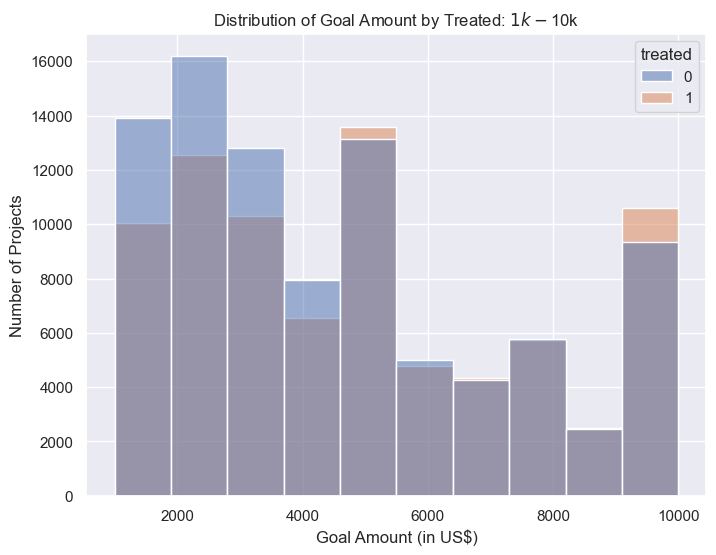

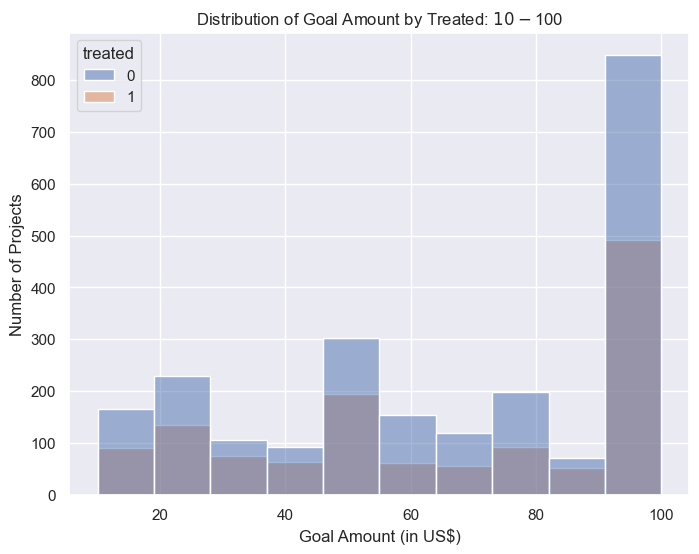

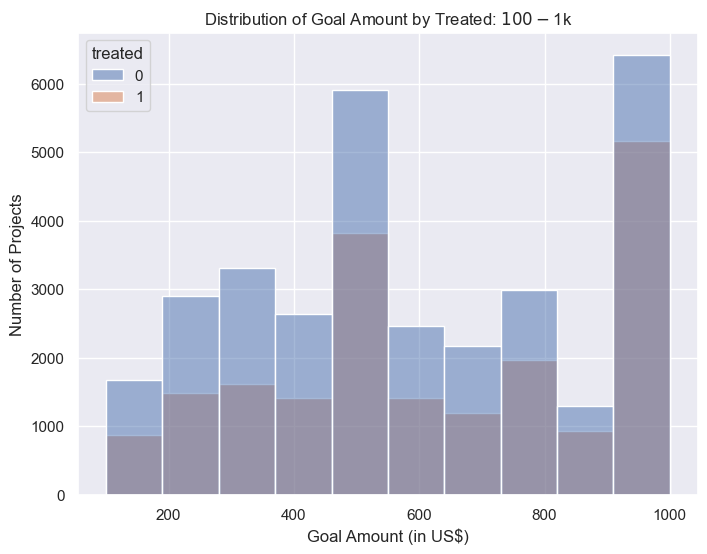

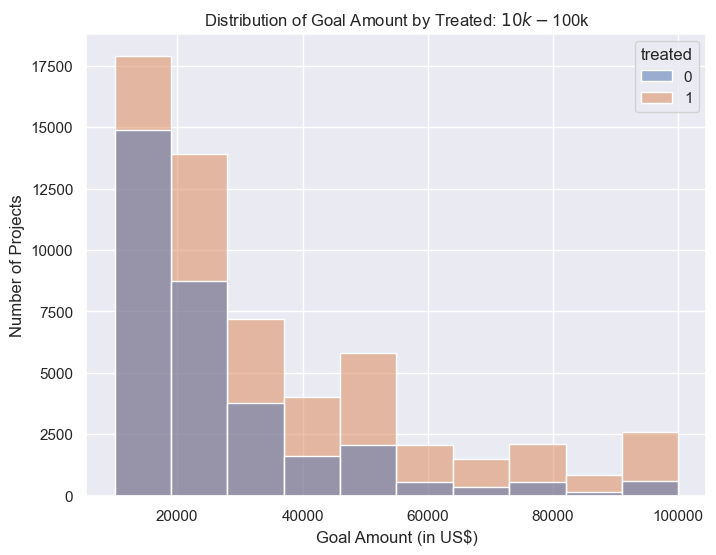

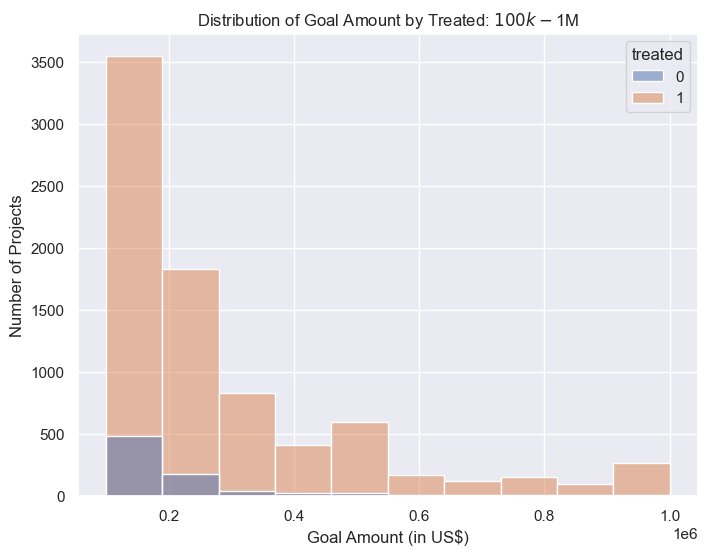

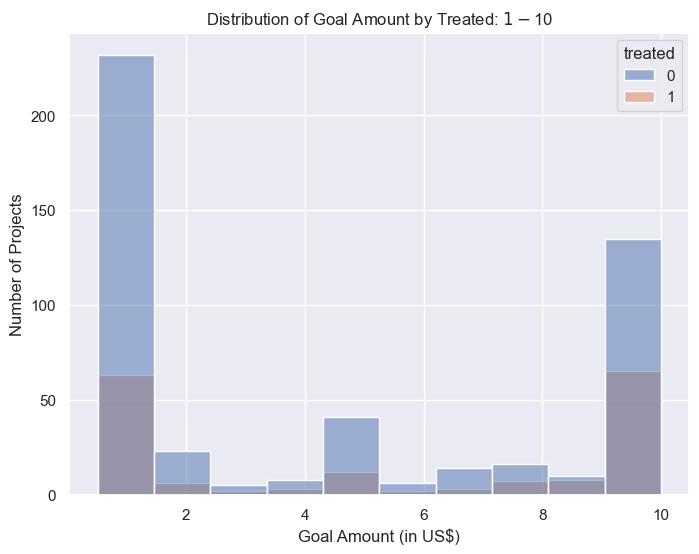

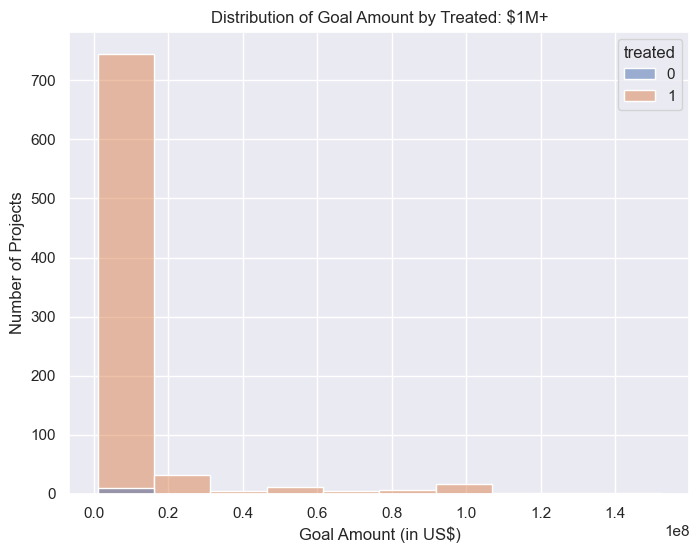

In [36]:
# Loop through each bin and create a separate plot
for bin_range in creator_data['Goal Bins (in US$)'].unique():
    bin_data = creator_data[creator_data['Goal Bins (in US$)'] == bin_range]
    
    # Plot distribution of Goal Amount by Treated for the current bin
    plt.figure(figsize=(8, 6))
    sns.histplot(data=bin_data, x='goal_usd_static', hue='treated', bins=10, kde=False)
    plt.title(f'Distribution of Goal Amount by Treated: {bin_range}')
    plt.xlabel('Goal Amount (in US$)')
    plt.ylabel('Number of Projects')
    plt.show()

### Distribution of Entrpreneurs near cutoff

In [47]:
creator_data['dollars_to_goal_usd'] = creator_data['pledged_usd_static'] - creator_data['goal_usd_static']

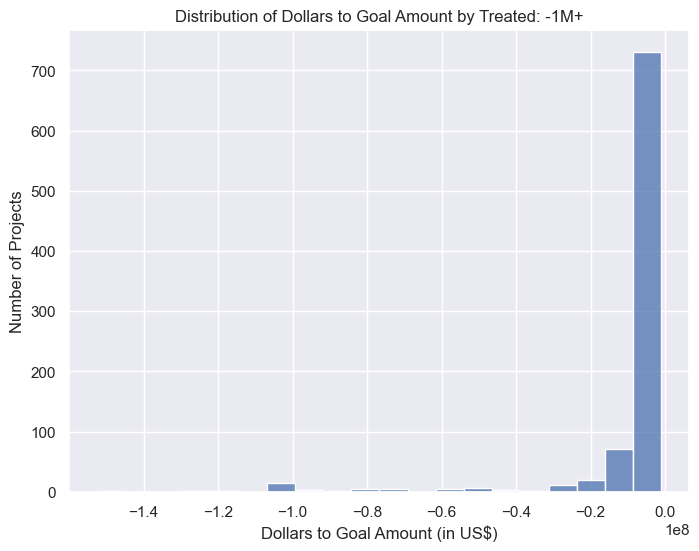

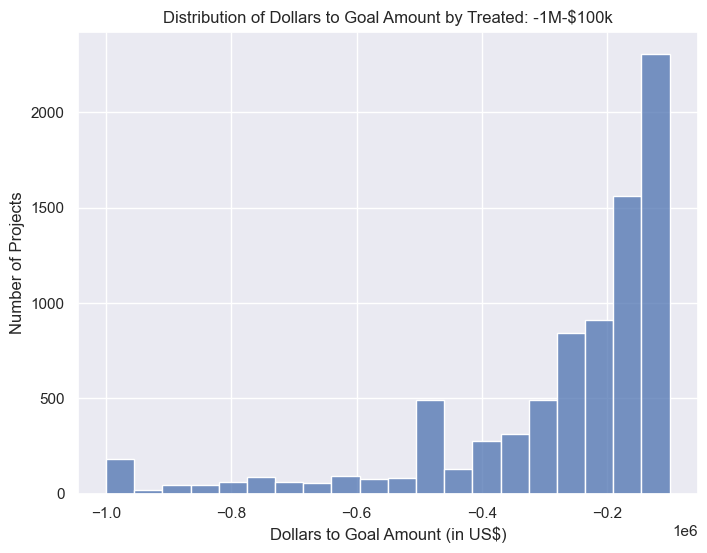

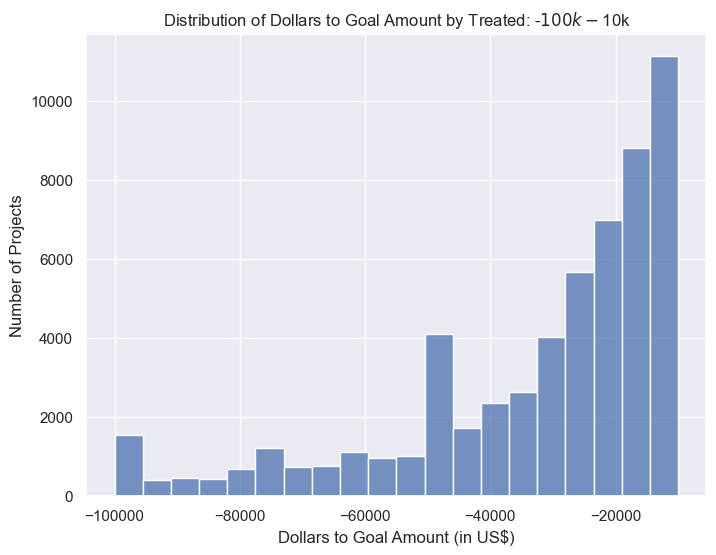

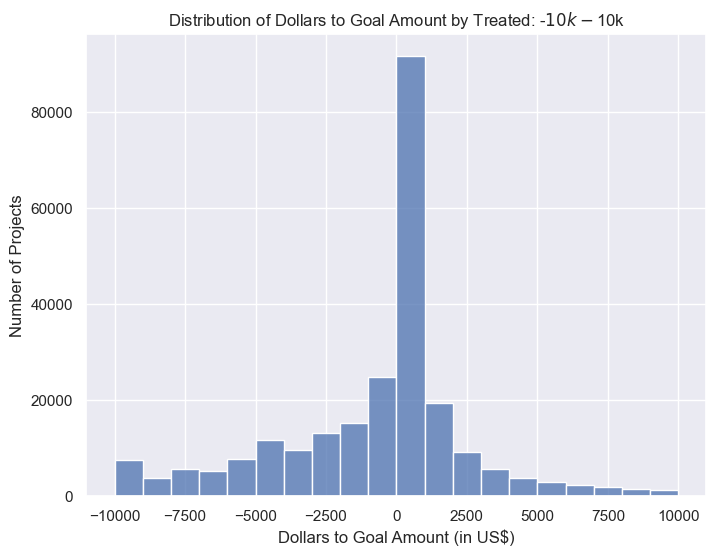

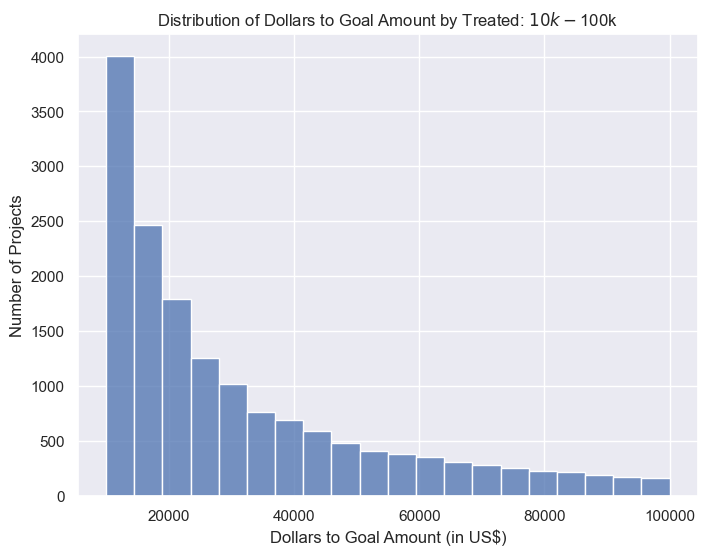

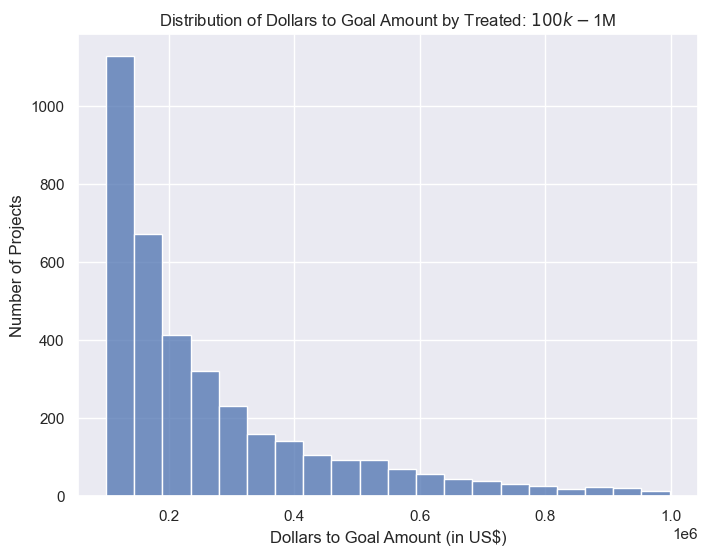

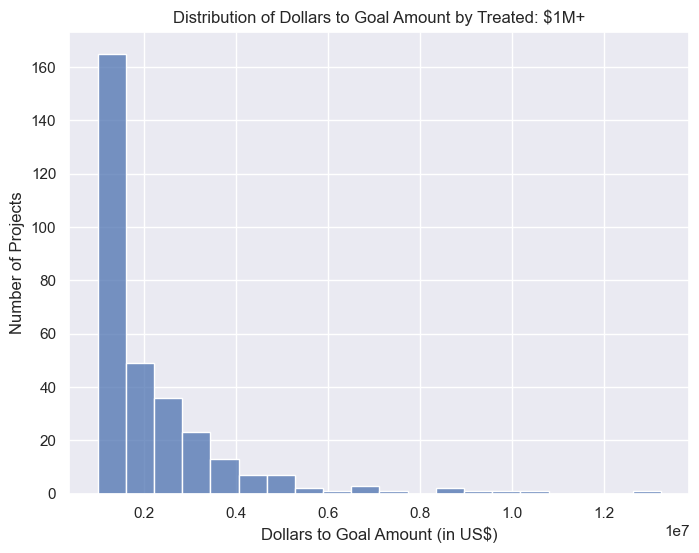

In [49]:
# Loop through each bin and create a separate plot
dollars_to_goal_bins = [-np.inf,-1000000, -100000, -10000, 10000, 100000, 1000000, np.inf]

creator_data['Dollars to Goal Bins (in US$)'] = pd.cut(creator_data['dollars_to_goal_usd'], dollars_to_goal_bins, labels = ['-1M+', '-1M-$100k', '-$100k-$10k', '-$10k-$10k', '$10k-$100k', '$100k-$1M', '$1M+'])
# Map the bins to the correct range


for bin_range in creator_data['Dollars to Goal Bins (in US$)'].unique().sort_values():
    bin_data = creator_data[creator_data['Dollars to Goal Bins (in US$)'] == bin_range]

    # Plot distribution of Dollars to Goal Amount by Treated for the current bin
    plt.figure(figsize=(8, 6))
    sns.histplot(data=bin_data, x='dollars_to_goal_usd', bins=20, kde=False)
    plt.title(f'Distribution of Dollars to Goal Amount by Treated: {bin_range}')
    plt.xlabel('Dollars to Goal Amount (in US$)')
    plt.ylabel('Number of Projects')
    plt.show()